### Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load the dataset

In [2]:
df = pd.read_csv("german_credit_data.csv", index_col=0)

In [3]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


### Analyse the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [5]:
df.shape

(1000, 10)

In [6]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


### Exploratory Data Analysis

In [7]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [8]:
df_isnull = pd.DataFrame(df.isnull(), columns = df.columns)

<AxesSubplot:>

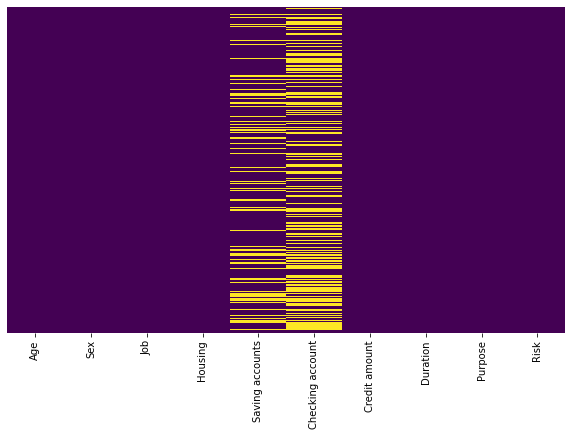

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df_isnull, yticklabels= False, cmap= "viridis", cbar = False)

There are missing values in "Saving accounts" and "Checking account" columns. I have introduced a new category value called “Others” for both Saving account and Checking account columns.

In [10]:
df["Saving accounts"].fillna("others", inplace=True)
df["Checking account"].fillna("others", inplace=True)

<AxesSubplot:xlabel='Purpose', ylabel='Count'>

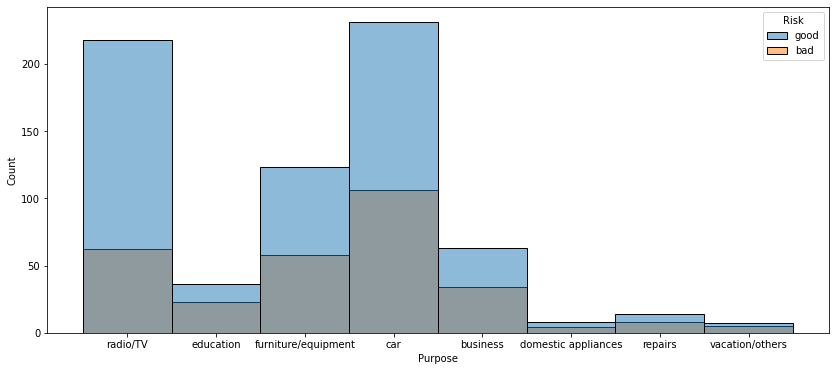

In [11]:
plt.figure(figsize=(14,6))
sns.histplot(x="Purpose", data=df, hue=df["Risk"])

Text(0.5, 1.0, 'Sex vs Age')

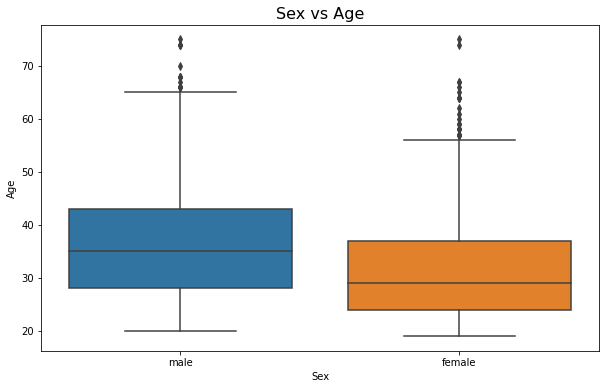

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Sex", y="Age", data=df)
plt.title("Sex vs Age", size=16)

Text(0.5, 1.0, 'Purpose vs Credit amount')

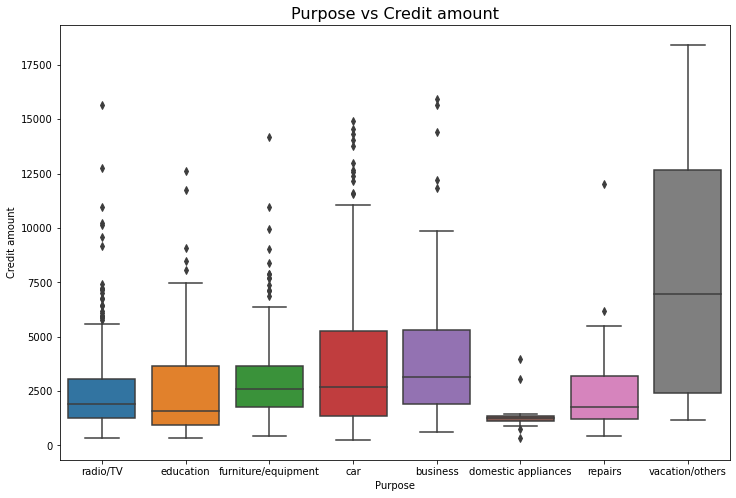

In [13]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Purpose", y="Credit amount", data=df)
plt.title("Purpose vs Credit amount", size=16)

Text(0.5, 1.0, 'Correlations')

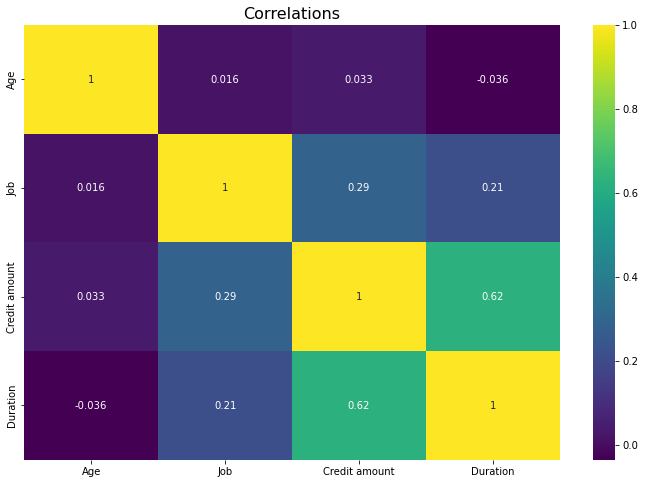

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="viridis")
plt.title("Correlations", size=16)

<Figure size 864x576 with 0 Axes>

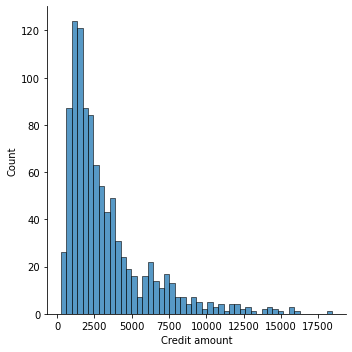

In [15]:
plt.figure(figsize=(12,8))
sns.displot(x="Credit amount", data=df, bins=50)

### Categorical columns encoding

In [16]:
df["Risk"] = df["Risk"].map({"good":0,"bad":1})

#### OneHot encoding

In [17]:
cat_features = [col for col in df.columns if df[col].dtype=="object"]

df1 = pd.get_dummies(df[cat_features], drop_first=True)

df.drop(cat_features, inplace=True, axis=1)

df2 = pd.concat([df, df1], axis=1)

In [18]:
df2

,Age,Job,Credit amount,Duration,Risk,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_others,...,Checking account_moderate,Checking account_others,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,2,1169,6,0,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,22,2,5951,48,1,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,49,1,2096,12,0,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,45,2,7882,42,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,53,2,4870,24,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,1,1736,12,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
996,40,3,3857,30,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
997,38,2,804,12,0,1,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
998,23,2,1845,45,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [19]:
X = df.drop(["Risk"], axis=1)
y = df["Risk"]

### Splitting the data into training and testing datasets

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Features Scaling

In [21]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

### Accuracy

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

score = accuracy_score(y_test, y_pred)

In [24]:
print("Accuracy : ",round(score*100, 2))

Accuracy :  70.0


#### Confusion Matrix

In [25]:
confusion_matrix(y_test, y_pred)

array([[157,  21],
       [ 54,  18]], dtype=int64)

#### Classification Report

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.88      0.81       178
           1       0.46      0.25      0.32        72

    accuracy                           0.70       250
   macro avg       0.60      0.57      0.57       250
weighted avg       0.66      0.70      0.67       250

